## Assignment 7: Exploring Ensemble Algorithms (Part I)

### Stefenie Pickston
#### 1506427

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


Loading and preparing the data.

In [2]:
train = pd.read_csv('../input/fashionmnist/fashion-mnist_train.csv', dtype=int)
X_train = train.drop('label', axis=1)
y_train = train['label']
test = pd.read_csv('../input/fashionmnist/fashion-mnist_test.csv', dtype=int)
X_test = test.drop('label', axis=1)
y_test = test['label']

Plot the first 3 images from X_train. You can retrieve the raw gray scale values of the first image and turn them into a 28 by 28 numpy-area like so:

Hint: you can use np.reshape(array, (28,28)) to reshape an array to 28x28, note array must have exactly 784 elements or this code will fail

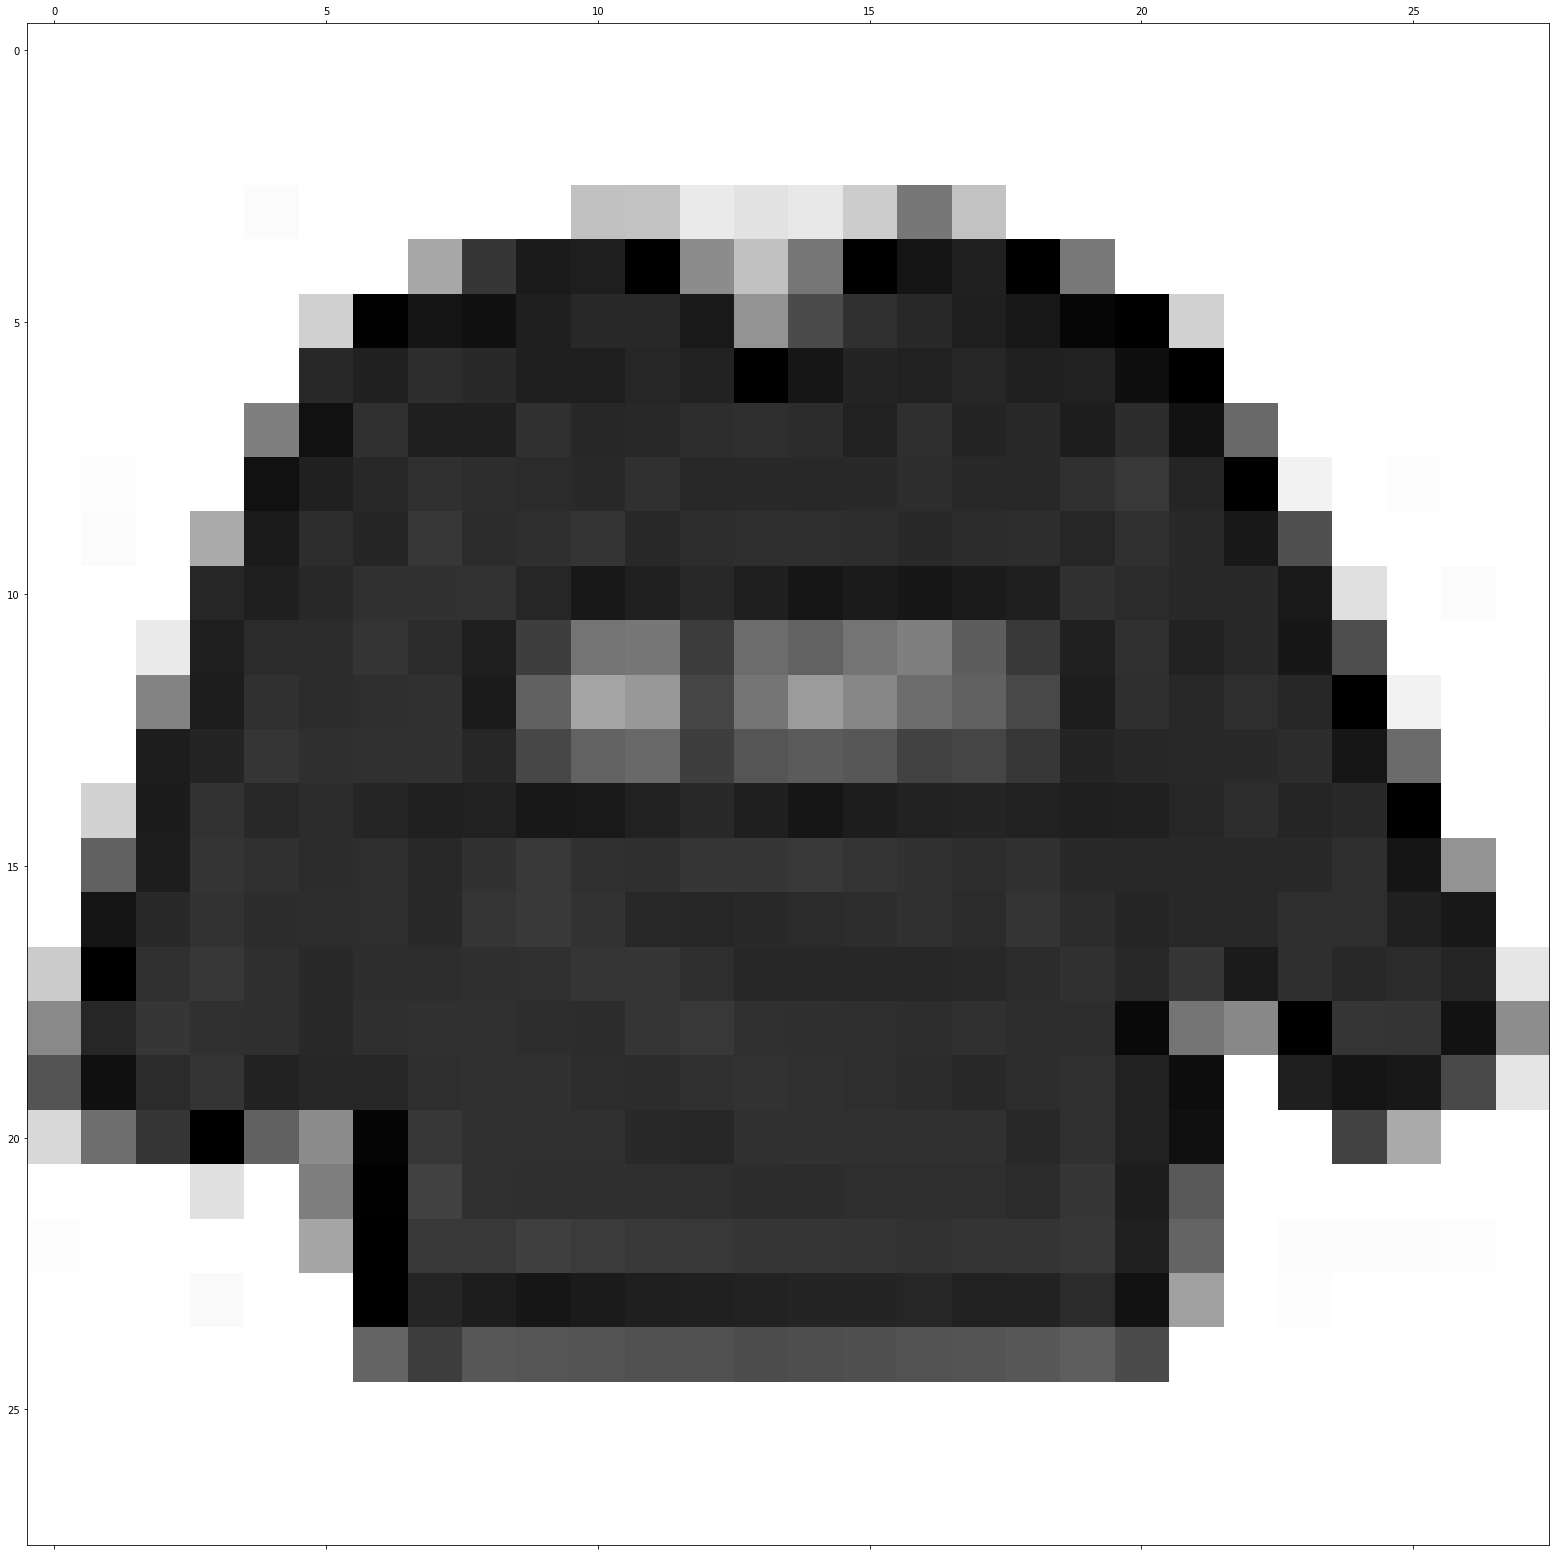

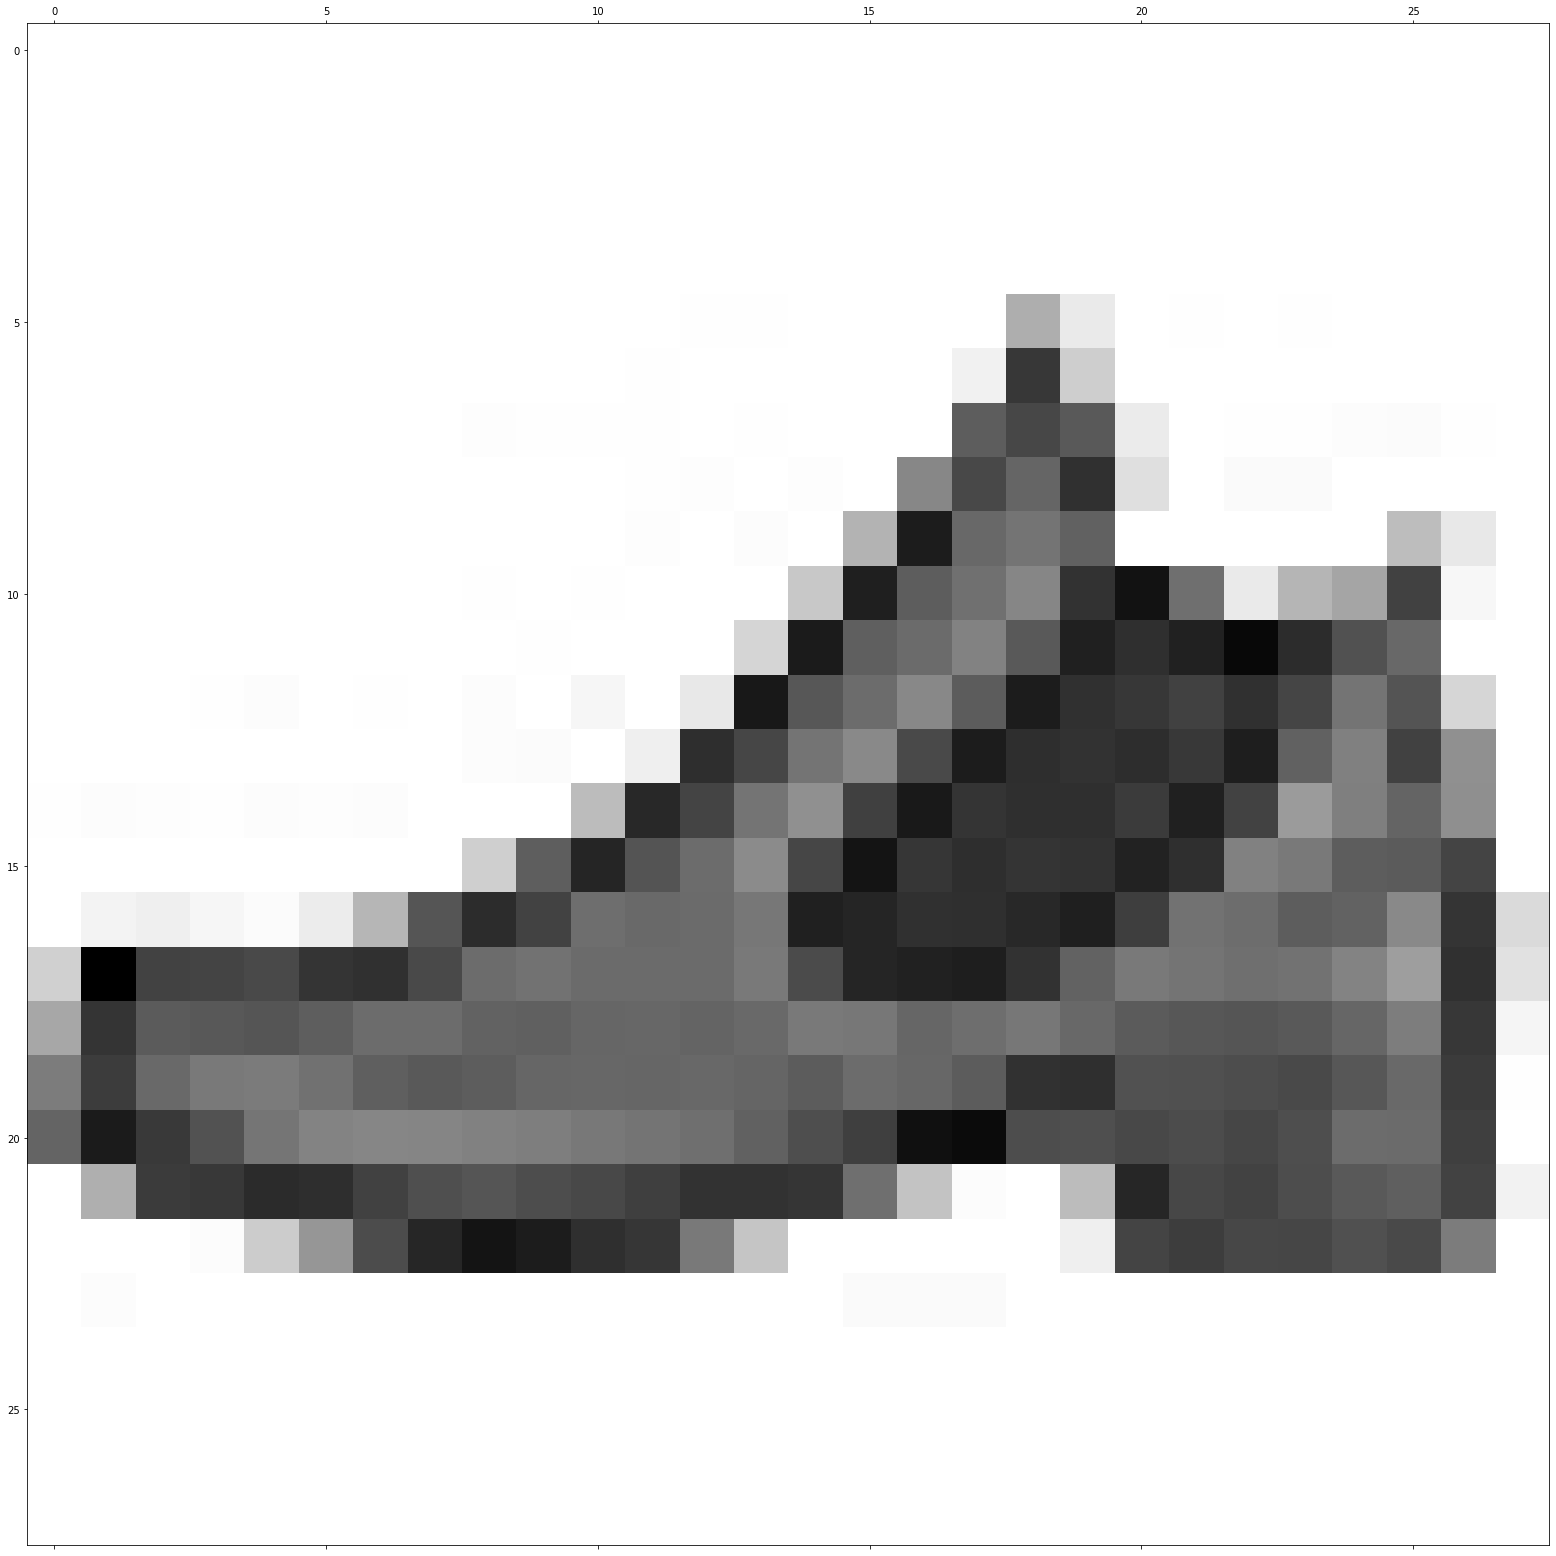

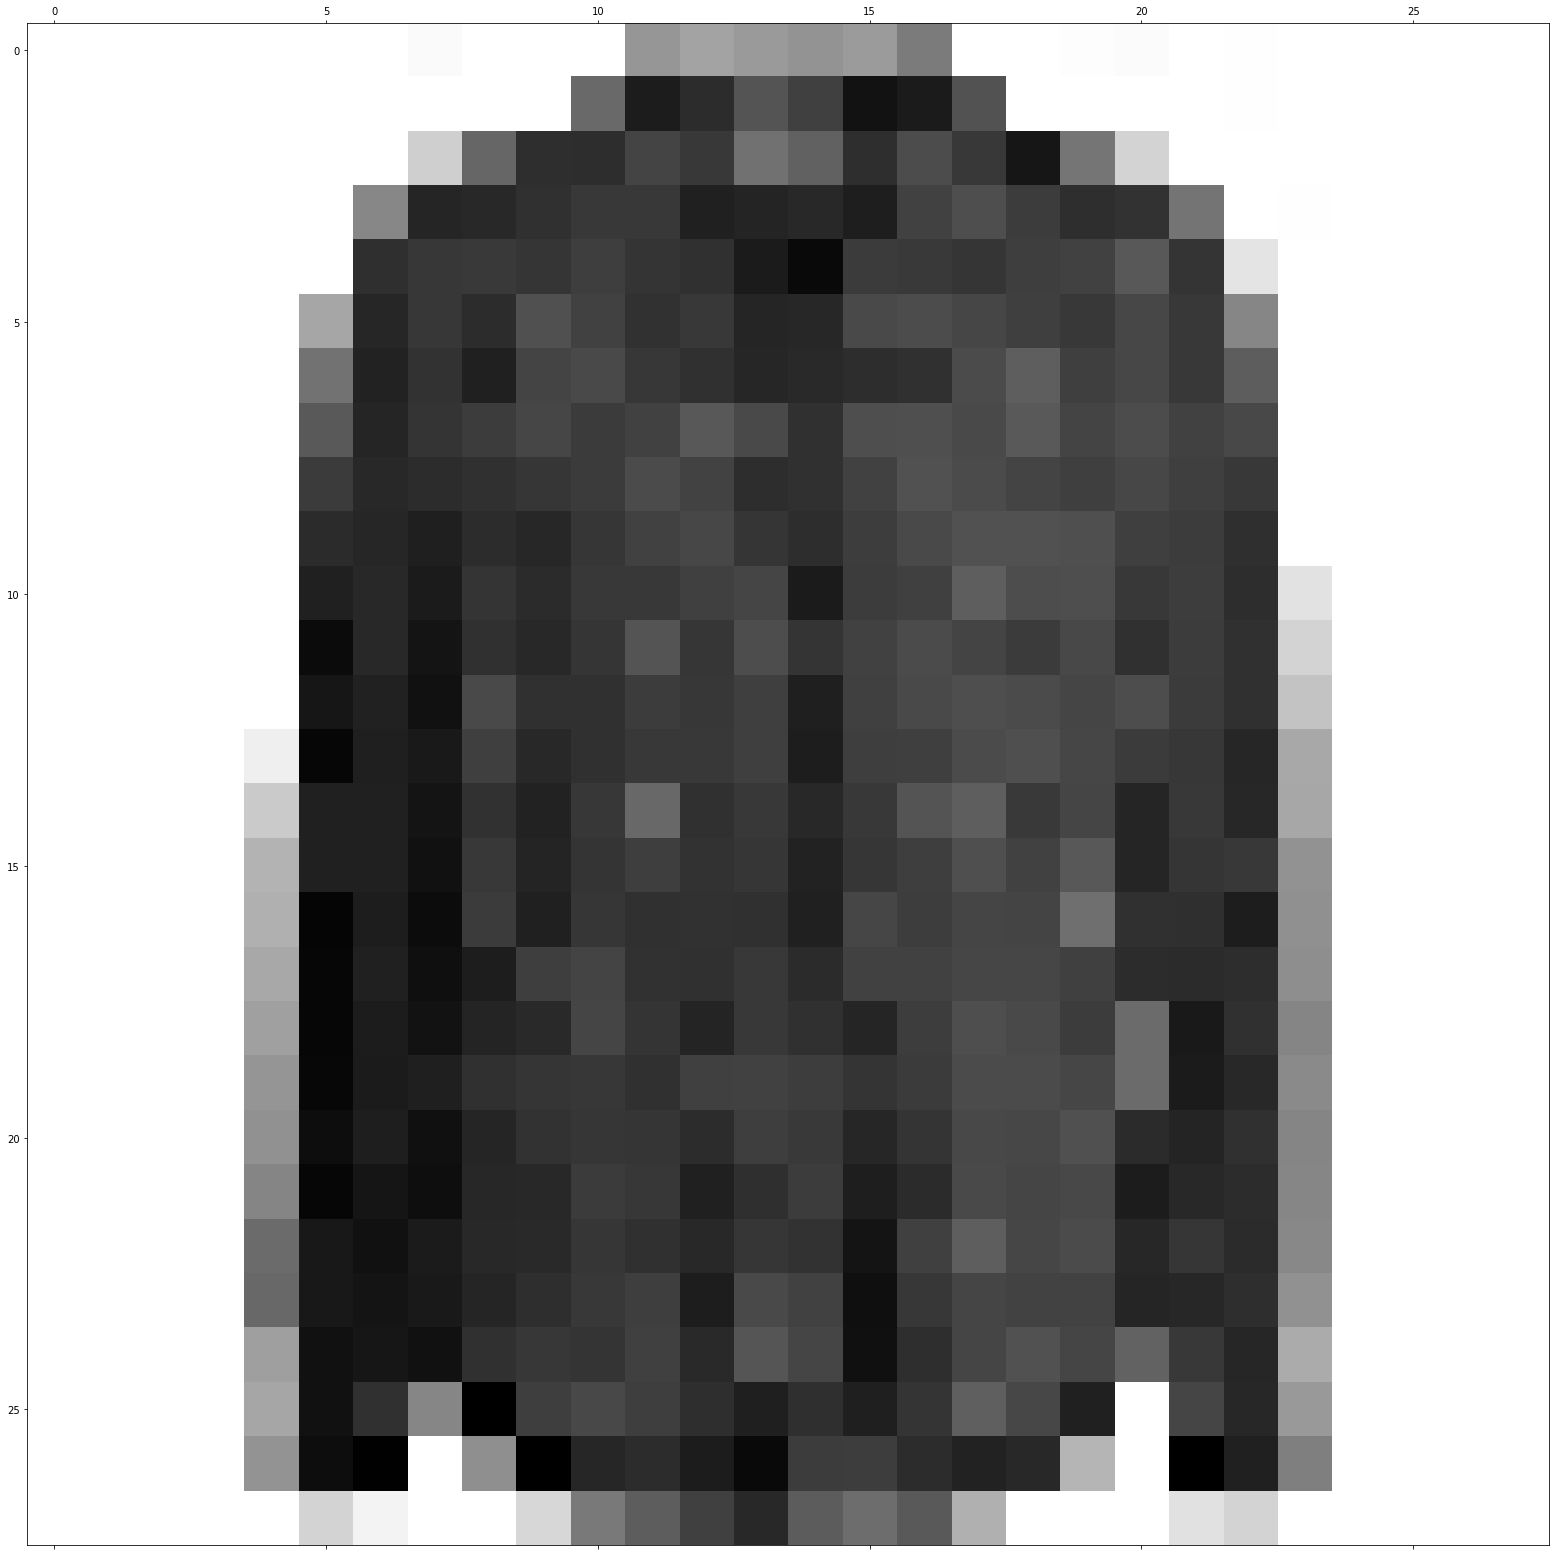

In [3]:
# import libraries
import matplotlib.pyplot as plt

def plot_matrix(m,target_names=None,cm=plt.cm.viridis):
    fig = plt.figure(figsize=m.shape)
    ax = fig.add_subplot(111)
    cax = ax.matshow(m,cmap=cm)
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
        fig.colorbar(cax)
        plt.show()
        
# prints 3 pictures
for i in range(3):
    plot_matrix(np.array(X_train[i:i+1]).reshape((28,28)),cm=plt.cm.binary)

Applying a grid search

Define a function for finding a good combination of hyper-parameter values that will work for the RandomForestClassifier and the ExtraTreesClassifier. Try all possible pairs for max_features in [4,8,12,16,'auto'] and max_depth in [4,8,12,16,None]. 

Select the combination that gives you the highest out-of-bag score for accuracy. You also want to be able to specify the ensemble size, with a default of 30.

In [4]:
max_features = [4,8,12,16,'auto']
max_depth = [4,8,12,16,None]

def grid_search(CLF, X_train, y_train, n_estimator=30):
    best_oob = 0;
    best_mf = 0;
    best_md = 0;
    # for all combinations of max_depth + max_features:
    for md in max_depth:
        for mf in max_features:

          # initialise the classifier, setting the oob_score and the bootstrap flag
          #    also set random_state to our ID
          #    and set max_depth, max_features, and n_estimators
          #    and n_jobs=-1  for some multi-core processing
            grid_clf = CLF(max_depth = md, max_features=mf,random_state=1506427,n_estimators=n_estimator, n_jobs=-1, oob_score=True,bootstrap=True)
      # train the classifier using the train data
            grid_clf.fit(X_train,y_train)
      # retrieve the oob score
            oob = grid_clf.oob_score_
      # print max_depth, max_features, and oob score
            print(md)
            print(mf)
            print(oob)
            if(oob > best_oob):
                best_oob = oob
                best_mf = mf
                best_md = md
                print("New Highest oob!")
    print("Finished search.")
    # return the highest oob score and the respective max_depth and max_features values, and the classifier with that max_depth and max_features)
    return [best_oob,best_mf,best_md]

Run grid_search for both RandomForestClassifier, ExtraTreesClassifier (n_estimators=30) and ExtraTreeClassifier (n_estimators=90). Print the results from the grid_search (There should be 25 combinations for each classifiers, note, this function should takes about 15 minutes to complete all three classifiers)

In [5]:
from sklearn.ensemble import RandomForestClassifier
print(grid_search(RandomForestClassifier, X_train, y_train))

from sklearn.ensemble import ExtraTreesClassifier
# default
print(grid_search(ExtraTreesClassifier, X_train, y_train))
# n_estimators=90
print(grid_search(ExtraTreesClassifier, X_train, y_train, n_estimator=90))

4
4
0.7055
New Highest oob!
4
8
0.7239666666666666
New Highest oob!
4
12
0.7207
4
16
0.72905
New Highest oob!
4
auto
0.7366166666666667
New Highest oob!
8
4
0.79235
New Highest oob!
8
8
0.8068666666666666
New Highest oob!
8
12
0.8141
New Highest oob!
8
16
0.8151833333333334
New Highest oob!
8
auto
0.8231166666666667
New Highest oob!
12
4
0.82485
New Highest oob!
12
8
0.8410833333333333
New Highest oob!
12
12
0.8471333333333333
New Highest oob!
12
16
0.8528833333333333
New Highest oob!
12
auto
0.8558333333333333
New Highest oob!
16
4
0.8383166666666667
16
8
0.8520666666666666
16
12
0.8559666666666667
New Highest oob!
16
16
0.85915
New Highest oob!
16
auto
0.86295
New Highest oob!
None
4
0.8427333333333333
None
8
0.85285
None
12
0.8554833333333334
None
16
0.8580333333333333
None
auto
0.8605333333333334
Finished search.
[0.86295, 'auto', 16]
4
4
0.66795
New Highest oob!
4
8
0.6921666666666667
New Highest oob!
4
12
0.704
New Highest oob!
4
16
0.7152833333333334
New Highest oob!
4
auto
0.72

Train a RandomForestClassifier with the best hyper-parameter settings as returned from grid_search
 - Compute and print accuracy for the test set. 
 - Compute and print the confusion matrix for the test set
 - Plot the confusion matrix.
 - Retrieve the feature_importances from your model, turn them into a 28 by 28 numpy array and plot this matrix as well.
- Do the above steps for both variants of ExtraTreeClassifier

[[844   0  14  32   2   2  95   0  11   0]
 [  2 968   7  16   1   2   3   0   1   0]
 [  8   1 790  13 131   0  47   0  10   0]
 [ 20   7  10 921  21   0  20   0   1   0]
 [  0   0  63  33 847   0  54   0   3   0]
 [  0   0   0   0   0 935   0  46   5  14]
 [175   2 103  25  79   0 603   0  13   0]
 [  0   0   0   0   0  13   0 924   0  63]
 [  1   1   8   0   4   1   8   3 973   1]
 [  0   0   1   0   0   8   0  39   3 949]]
0.8754


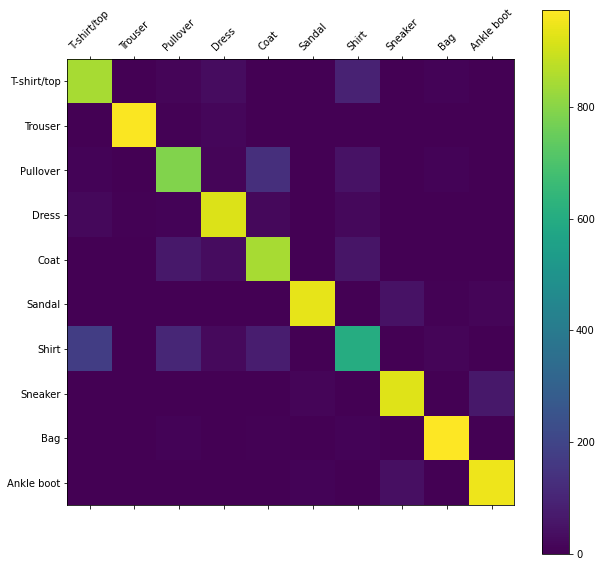

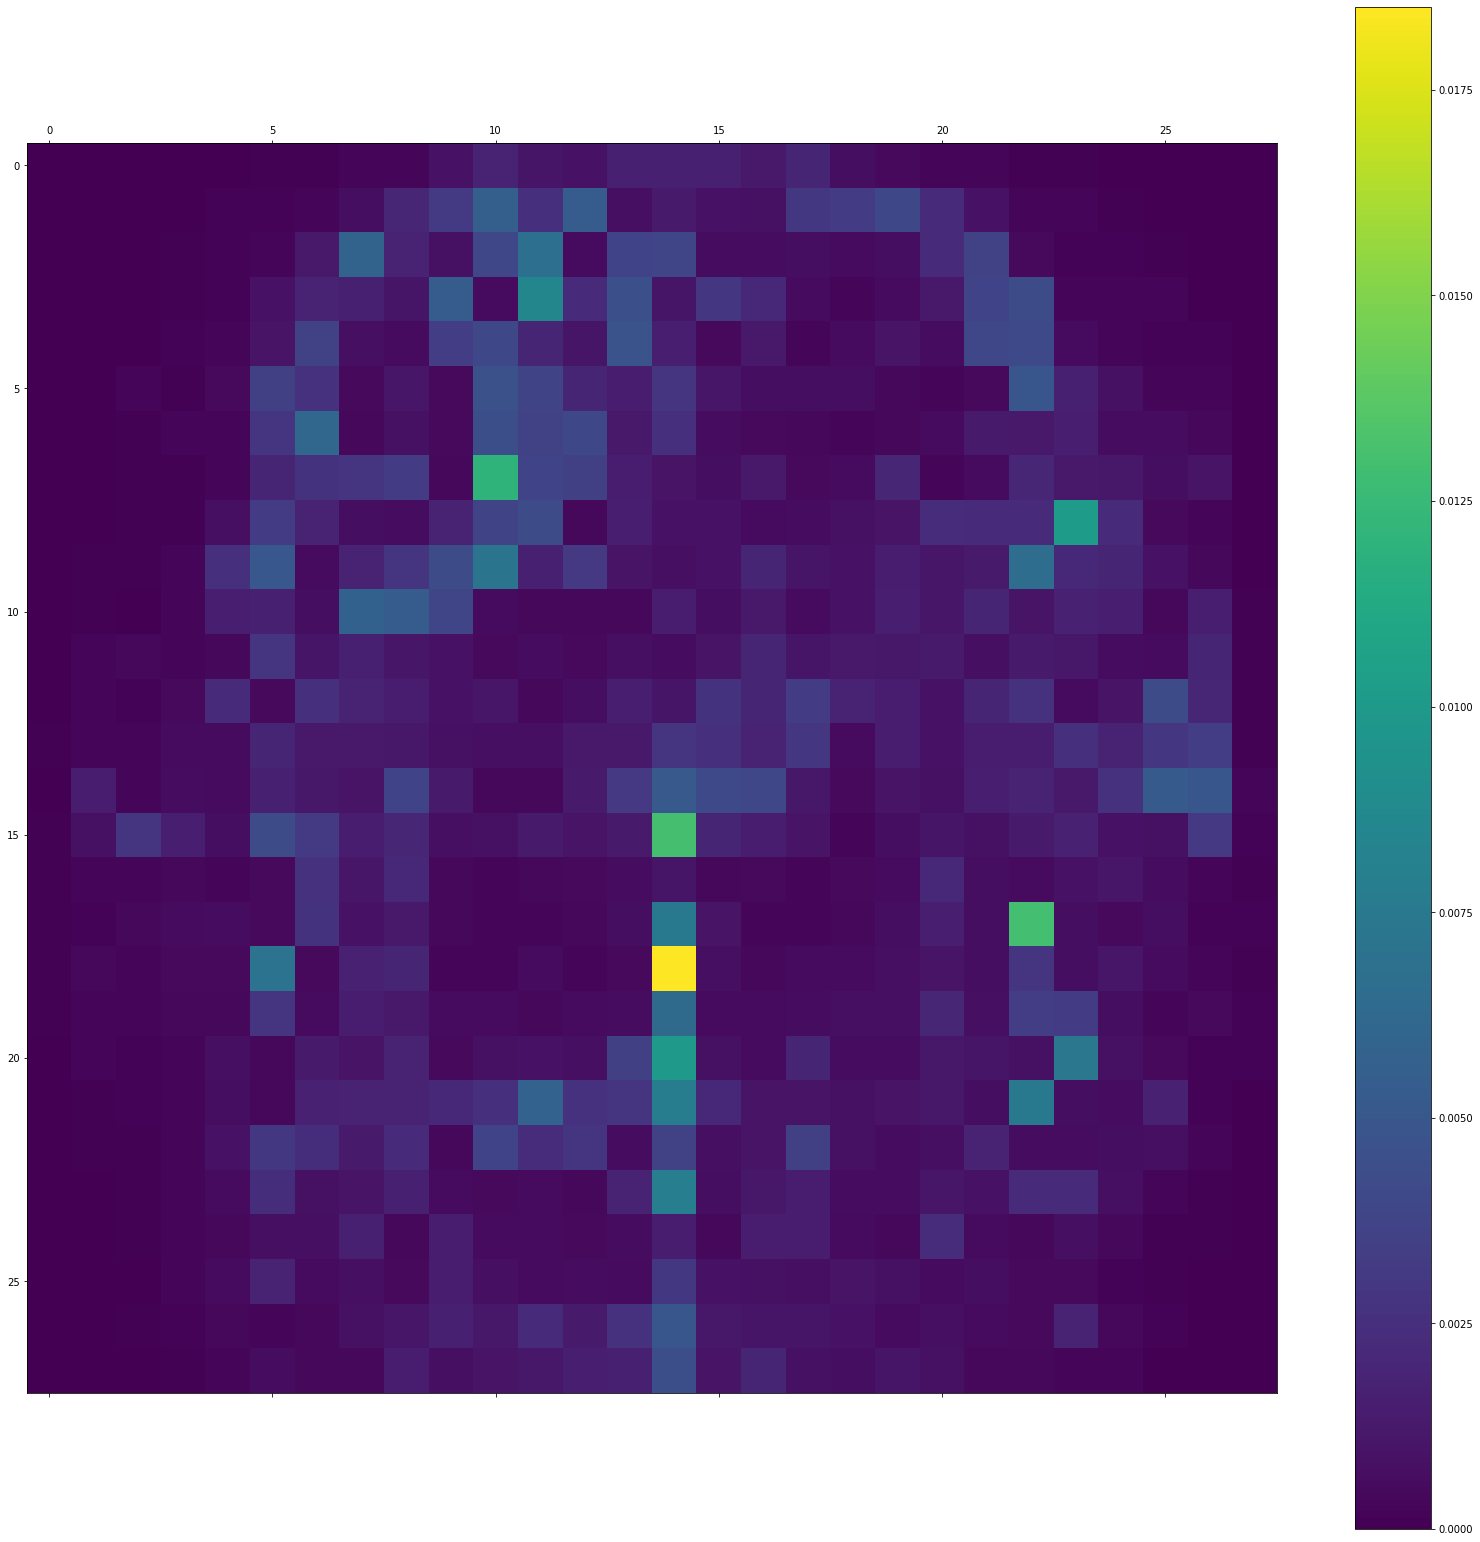

In [6]:
# results arrays
rf_array = [0.86295, 'auto', 16]
et_30 = [0.8516833333333333, 'auto', None]
et_90 = [0.8704666666666667, 'auto', None]

# human readable labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
             'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# method to plot the matrix
def plot_matrix(m,target_names=None, cm=plt.cm.viridis ):
    fig = plt.figure(figsize=m.shape)
    ax = fig.add_subplot(111)
    cax = ax.matshow(m,cmap=cm)
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    fig.colorbar(cax)

rf = RandomForestClassifier(random_state=1506427, max_depth = rf_array[2], max_features = rf_array[1], n_estimators=30)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

# confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
print(cm)
plot_matrix(cm, target_names=labels)

# accuracy
from sklearn.metrics import accuracy_score
print(str(accuracy_score(y_test, pred)))

# feature importance
fi = rf.feature_importances_
plot_matrix(np.reshape(fi,(28,28)))

[[851   0  14  30   1   2  93   0   9   0]
 [  3 971   7  14   1   1   3   0   0   0]
 [ 14   1 794  13 115   0  57   0   6   0]
 [ 23   7  10 927  22   0  11   0   0   0]
 [  0   1  75  40 833   0  49   0   2   0]
 [  0   0   0   1   0 936   0  41   5  17]
 [189   0 104  38  73   0 580   0  16   0]
 [  0   0   0   0   0  24   0 929   0  47]
 [  2   1   3   3   2   3  12   3 971   0]
 [  0   0   0   0   0   8   0  38   1 953]]
0.8745


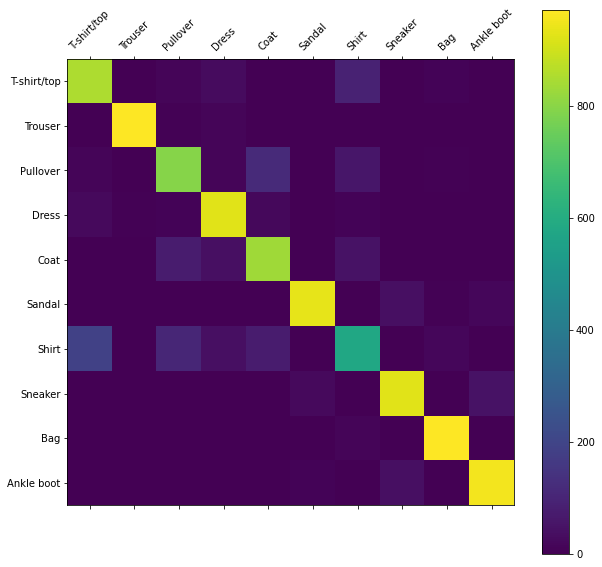

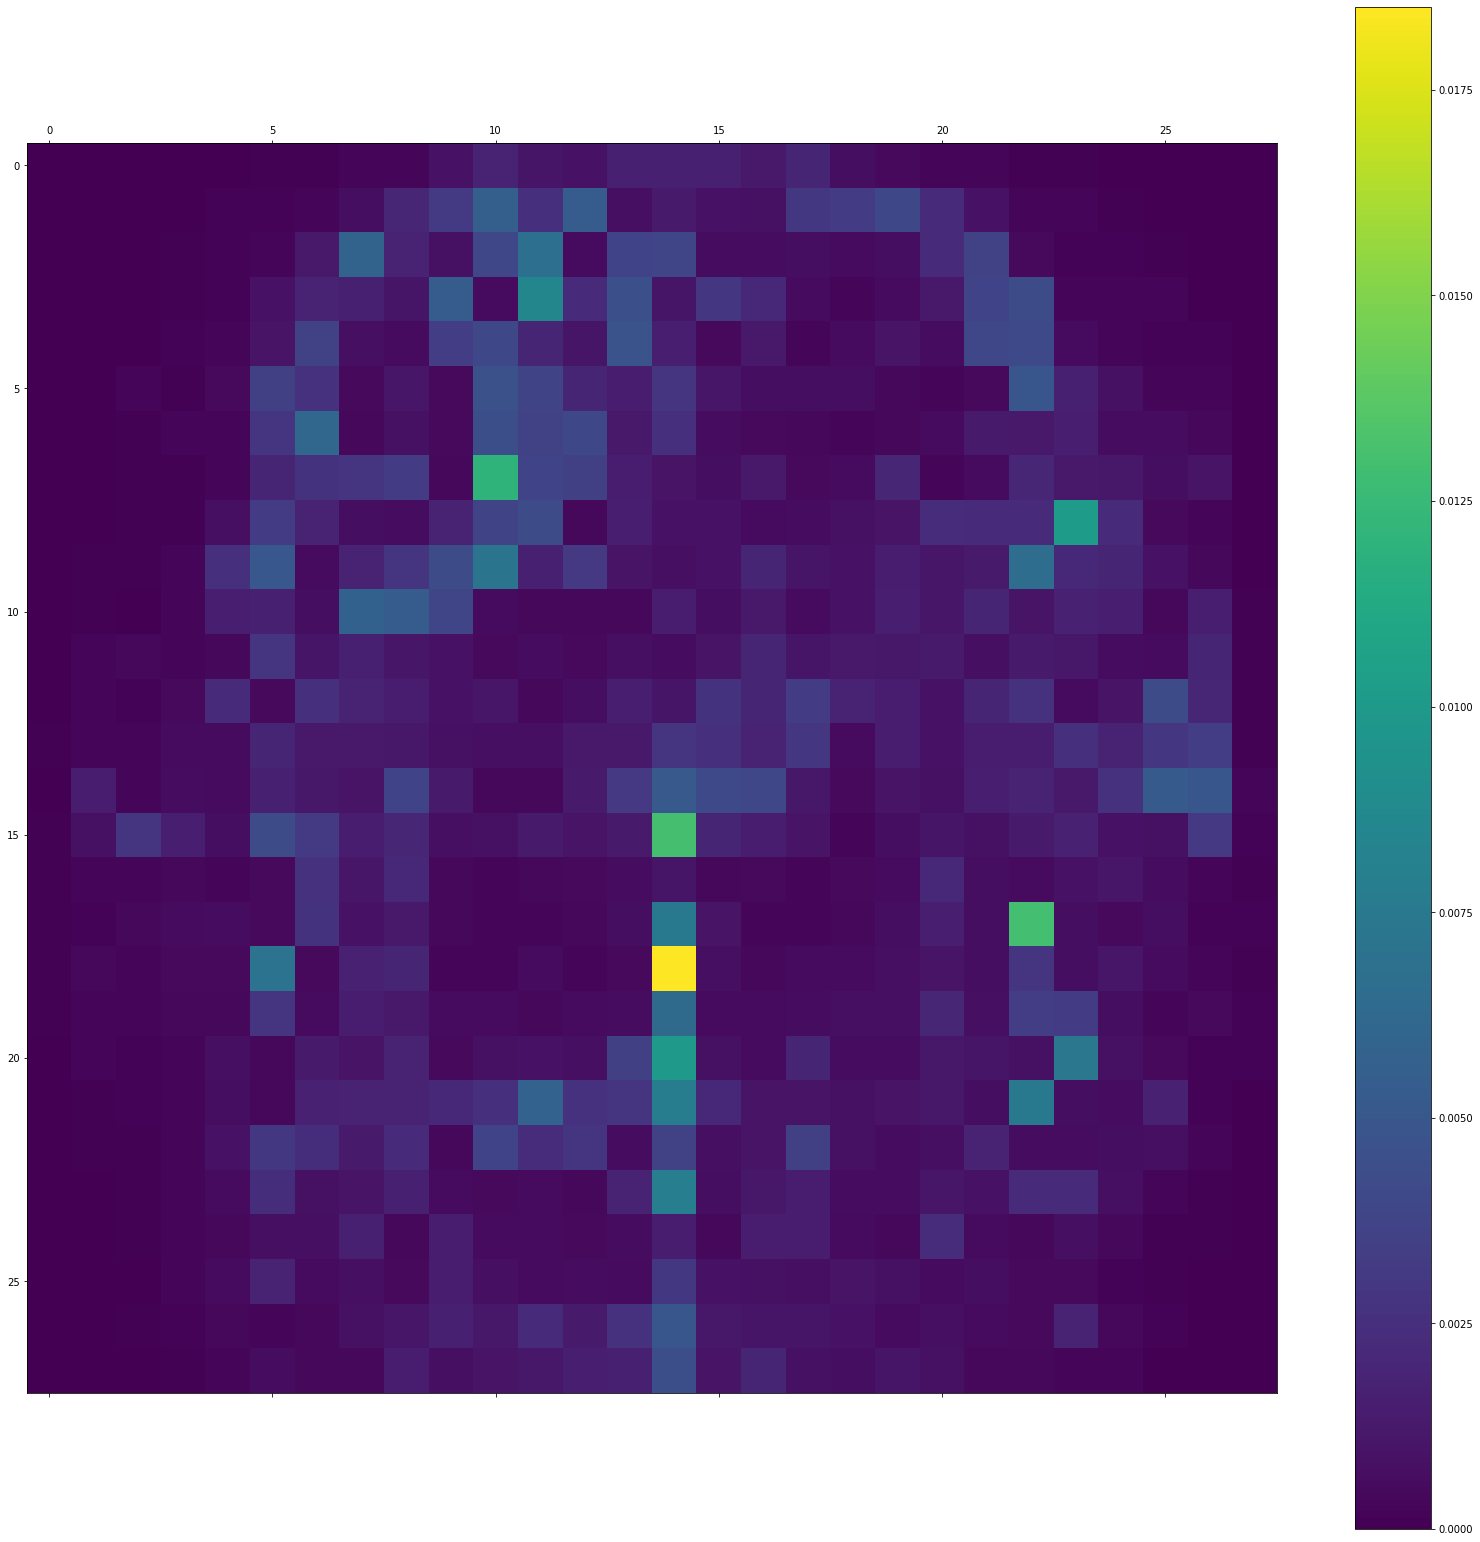

In [7]:
# extra trees
et_1 = ExtraTreesClassifier(random_state=1506427, max_depth = et_30[2], max_features = et_30[1], n_estimators=30)
et_1.fit(X_train, y_train)
pred = et_1.predict(X_test)

cm = confusion_matrix(y_test, pred)
print(cm)
plot_matrix(cm, labels)

#accuracy
print(str(accuracy_score(y_test, pred)))

# feature importance
fi = rf.feature_importances_
plot_matrix(np.reshape(fi,(28,28)))

[[862   0  12  29   2   2  83   0  10   0]
 [  4 969   8  13   2   1   3   0   0   0]
 [ 12   0 802  12 115   0  51   0   8   0]
 [ 21   5  10 926  20   0  18   0   0   0]
 [  0   1  58  31 860   0  47   0   3   0]
 [  0   0   0   0   0 938   0  41   5  16]
 [180   0 103  28  67   0 608   0  14   0]
 [  0   0   0   0   0  20   0 932   0  48]
 [  1   1   6   2   2   1   8   3 976   0]
 [  0   0   0   0   0   7   0  41   1 951]]
0.8824


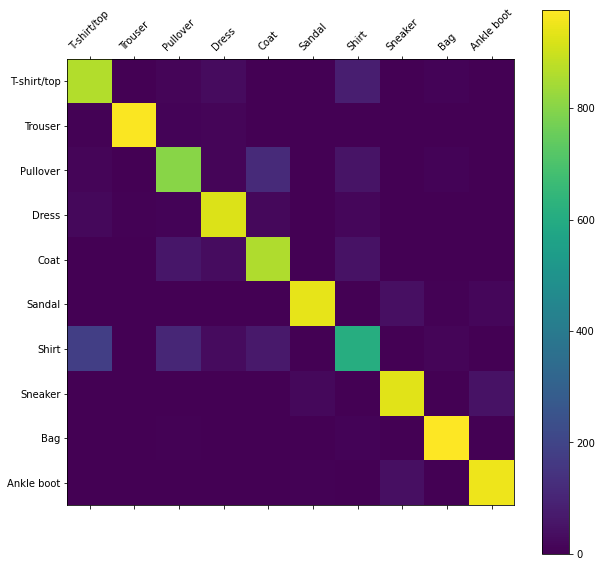

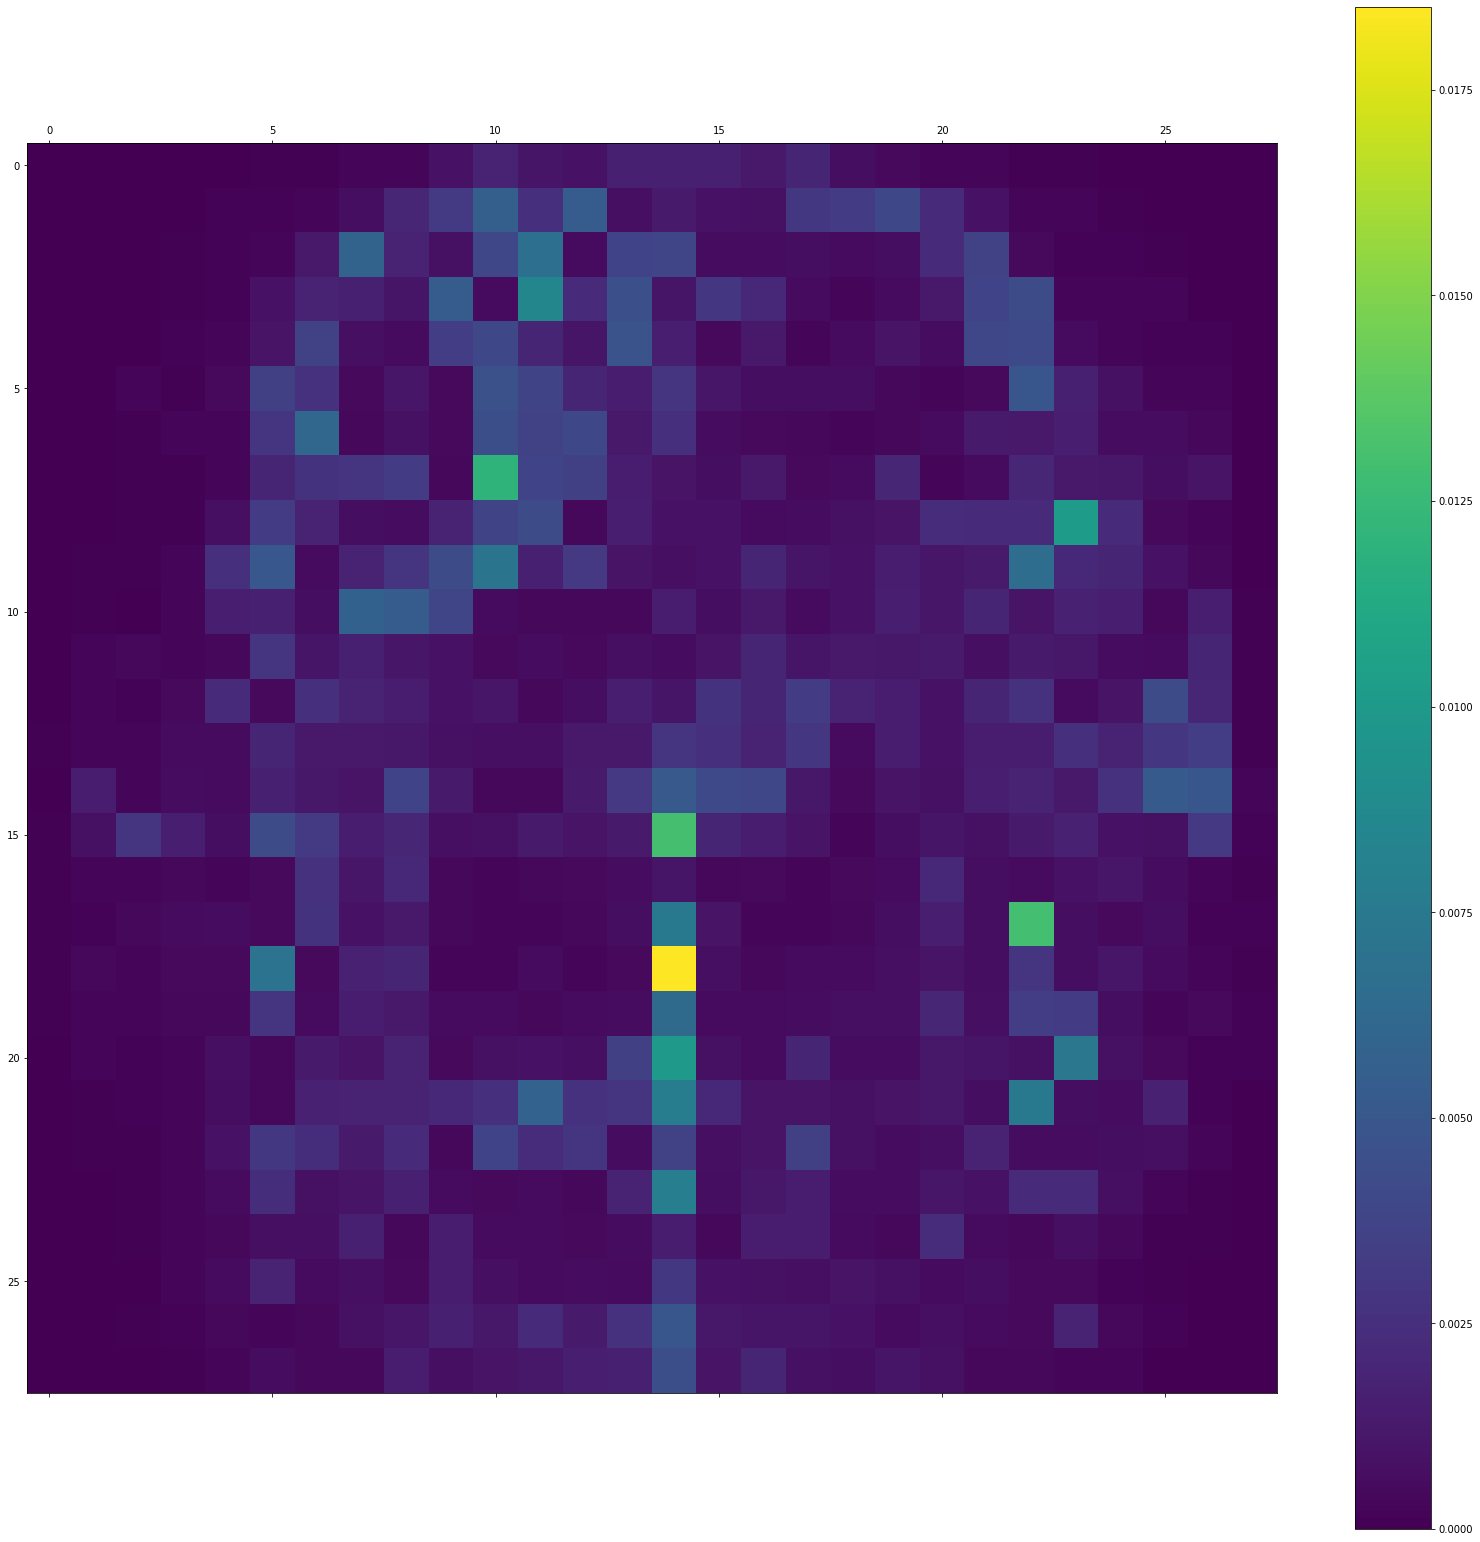

In [8]:
# extra trees but 90
et_2 = ExtraTreesClassifier(random_state=1506427, max_depth = et_90[2], max_features = et_90[1], n_estimators=90)
et_2.fit(X_train, y_train)
pred = et_2.predict(X_test)

cm = confusion_matrix(y_test, pred)
print(cm)
plot_matrix(cm, labels)

#accuracy
print(str(accuracy_score(y_test, pred)))

# feature importance
fi = rf.feature_importances_
plot_matrix(np.reshape(fi,(28,28)))

Discussion questions 

- Which of the three classifiers is most accurate on the test data?

The ExtraTrees classifier with the n_estimators value of 90 has the highest accuracy score.

- Look at your confusion matrix, what classes tends to be confused with each other, are they the same for the three classifiers. Are there any insights you can give regarding the classes that tend to be confused with each other?

Shirts tend to be confused for t-shirts, pullovers and coats. Coats and pullovers get confused with each other. Ankle boots and sneakers also tend to be confused with each other. This occurs in all three classifiers. This is because these items are worn on the same parts of the body.

- Look at the feature importance matrix, what do you notice about the feature importance matrix? Is there anything that relates that to the classes that are easily confused? 

The classifiers tend to look at the center parts such as buttons and collars. The main difference between shirts and t-shirts is the precense/absence of collars and buttons. The collar information is at the top left whilst the button inormation is in the center. The collar information is only on the left side as the algorithm automatically assumes that the image is symmetrical and that there will also be a collar on the right side, therefore no need to check.